In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Let's reload the updated dataset and prepare the data for a line plot showing the mean accuracy for each 'aug_num'.
updated_runs_df = pd.read_csv('./IBTA+CMIA.csv', converters={'summary': ast.literal_eval, 'config': ast.literal_eval})

In [2]:
# Extract 'aug_num' and 'val/acc_top1' from the dictionaries
updated_runs_df['aug_num'] = updated_runs_df['config'].apply(lambda x: x.get('data/aug_num', None))
updated_runs_df['use_cmia'] = updated_runs_df['config'].apply(lambda x: x.get('data/use_cmia', None))
updated_runs_df['val_acc_top1'] = updated_runs_df['summary'].apply(lambda x: x.get('val/acc_top1', None))
updated_runs_df['val_acc_top2'] = updated_runs_df['summary'].apply(lambda x: x.get('val/acc_top2', None))
updated_runs_df['val_acc_best'] = updated_runs_df['summary'].apply(lambda x: x.get('val/acc_best', None))

updated_runs_df['aug_num'] = pd.to_numeric(updated_runs_df['aug_num'])
updated_runs_df['use_cmia'] = pd.to_numeric(updated_runs_df['use_cmia'])
updated_runs_df['val_acc_top1'] = pd.to_numeric(updated_runs_df['val_acc_top1'])
updated_runs_df['val_acc_top2'] = pd.to_numeric(updated_runs_df['val_acc_top2'])
updated_runs_df['val_acc_best'] = pd.to_numeric(updated_runs_df['val_acc_best'])


In [3]:
# Calculate the mean accuracy for each 'aug_num' for both 'val_acc_top1' and 'val_acc_top2' and 'val_acc_best'
mean_val_acc_by_aug_top1 = updated_runs_df.groupby('aug_num')['val_acc_top1'].mean()
mean_val_acc_by_aug_top2 = updated_runs_df.groupby('aug_num')['val_acc_top2'].mean()
mean_val_acc_by_aug_best = updated_runs_df.groupby('aug_num')['val_acc_best'].mean()

# Calculate the mean accuracy for applying CMIA for each 'aug_num' for both 'val_acc_top1' and 'val_acc_top2' and 'val_acc_best'

# use_cmia를 문자열로 변환하여 seaborn이 구분할 수 있게 함
updated_runs_df['use_cmia'] = updated_runs_df['use_cmia'].apply(lambda x: 'True' if x else 'False')

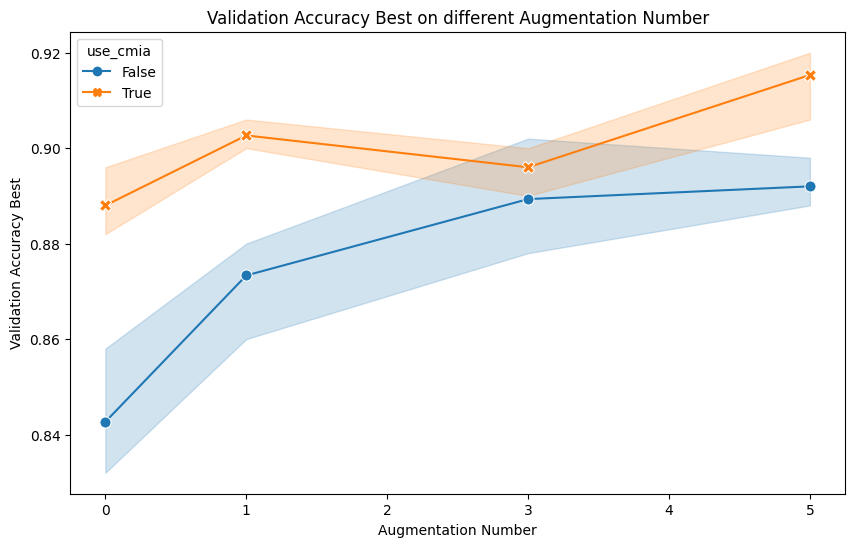

In [7]:
# Seaborn을 사용한 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=updated_runs_df, x='aug_num', y='val_acc_best', hue='use_cmia', style='use_cmia', markers=True, markersize=8, dashes=False)
plt.title('Validation Accuracy Best on different Augmentation Number')
plt.xlabel('Number of IBTA generated image per one original image')
plt.ylabel('Validation Accuracy Best')
# plt.legend(loc='lower right', fontsize=12)
plt.show()

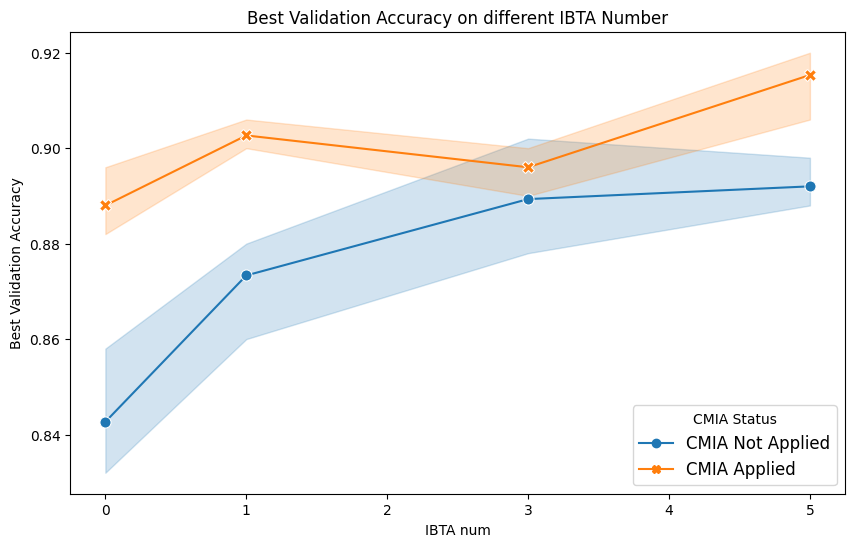

In [7]:
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(data=updated_runs_df, x='aug_num', y='val_acc_best', hue='use_cmia', style='use_cmia', markers=True, markersize=8, dashes=False)
plt.title('Best Validation Accuracy on different IBTA Number')
plt.xlabel('Number of IBTA generated image per one original image')
plt.ylabel('Best Validation Accuracy')

# 기존 범례를 제거합니다.
plt.legend([],[], frameon=False)

# 범례 핸들과 레이블을 추출합니다.
handles, labels = lineplot.get_legend_handles_labels()

# `use_cmia` 값에 따라 새로운 레이블을 할당합니다.
# 이 부분은 데이터와 범례의 항목에 따라 달라질 수 있으므로 확인이 필요합니다.
new_labels = ['CMIA Not Applied', 'CMIA Applied']
new_handles = [handles[0], handles[1]]  # 실제 라인에 해당하는 핸들을 선택합니다.

# 새로운 범례를 생성합니다.
plt.legend(new_handles, new_labels, title='CMIA Status', loc='lower right', fontsize=12)

plt.show()
plt.show()

In [ ]:
# use_cmia가 False이고 aug_num이 0인 행들을 필터링
filtered_df = updated_runs_df[(updated_runs_df['use_cmia'] == True) & (updated_runs_df['aug_num'] == 0)]

# 결과 출력
print(filtered_df['val_acc_best'].mean())

In [10]:
import matplotlib.pyplot as plt

# 주어진 데이터셋의 이미지 수
data_counts = {
    'Original Dataset': 12935,
    'CMIA Dataset': 57916,
    'IBTA Dataset': 64675
}

# 전체 이미지 수 계산
total_images = sum(data_counts.values())

# 각 데이터셋의 전체 이미지 수에 대한 비율 계산
data_portions = {dataset: (count / total_images) * 100 for dataset, count in data_counts.items()}

# 전체 이미지 수를 'k' 단위로 표현
total_images_k = total_images / 1000

data_portions, total_images_k

({'Original Dataset': 9.54429408379204,
  'CMIA Dataset': 42.73423549724776,
  'IBTA Dataset': 47.7214704189602},
 135.526)

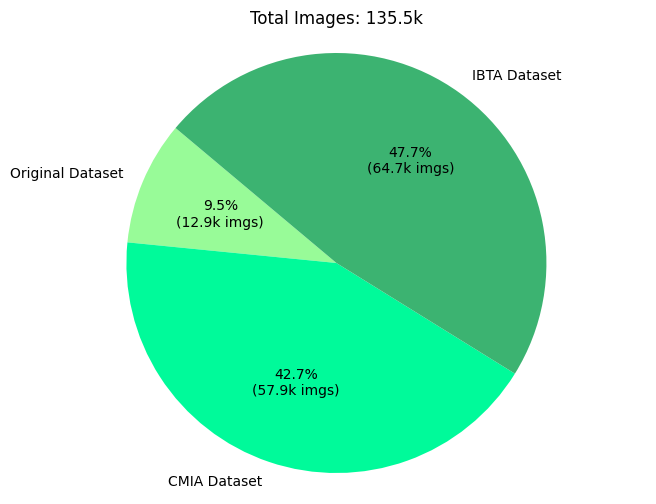

In [16]:
# 파이 차트 생성을 위한 준비
labels = list(data_portions.keys())
portions = list(data_portions.values())

# 다양한 채도의 초록색 계열 색상 지정
green_shades = ['#98fb98', '#00fa9a', '#3cb371']  # 밝은 초록, 중간 초록, 어두운 초록

# 파이 차트에 표시할 퍼센트와 이미지 수(k 단위)를 포맷팅하는 함수
def autopct_format_k(counts):
    def inner_autopct(pct):
        total = sum(counts)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val / 1000:.1f}k imgs)'
    return inner_autopct

# 채도가 다른 초록색 계열로 파이 차트 생성
plt.figure(figsize=(8, 6))
plt.pie(portions, labels=labels, autopct=autopct_format_k(list(data_counts.values())), startangle=140, colors=green_shades)
plt.axis('equal')  # 원형 차트가 원형으로 보이도록 설정
plt.title(f'Total Images: {total_images_k:.1f}k')
plt.show()